In [1]:
# importation of the package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data into dataframe
df = pd.read_csv("C:/Users/USER/Desktop/Data Science Course/Billionaire's Folder/Billionaire.csv")

# DATA ACCESSING

In [5]:
# print the first five rows of the dataframe
df.head()

Name NetWorth        Country         Source  Rank  \
0                Jeff Bezos   $177 B  United States         Amazon     1   
1                 Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2  Bernard Arnault & family   $150 B         France           LVMH     3   
3                Bill Gates   $124 B  United States      Microsoft     4   
4           Mark Zuckerberg    $97 B  United States       Facebook     5   

    Age          Industry  
0  57.0        Technology  
1  49.0        Automotive  
2  72.0  Fashion & Retail  
3  65.0        Technology  
4  36.0        Technology

In [11]:
# print the last five rows of the dataframe 
df.tail()

Name NetWorth Country        Source  Rank   Age  \
2750  Daniel Yong Zhang     $1 B   China    e-commerce  2674  49.0   
2751      Zhang Yuqiang     $1 B   China    Fiberglass  2674  65.0   
2752      Zhao Meiguang     $1 B   China   gold mining  2674  58.0   
2753     Zhong Naixiong     $1 B   China  conglomerate  2674  58.0   
2754    Zhou Wei family     $1 B   China      Software  2674  54.0   

             Industry  
2750       Technology  
2751    Manufacturing  
2752  Metals & Mining  
2753      Diversified  
2754       Technology

In [12]:
# randomly print 10 rows from the dataframe
df.sample(10)

Name NetWorth        Country  \
264             Michael Otto   $8.9 B        Germany   
1262      Hans-Werner Hector   $2.5 B        Germany   
2391          Chua Thian Poh   $1.2 B      Singapore   
437        Margaretta Taylor   $6.2 B  United States   
2407  J. Christopher Flowers   $1.2 B  United States   
418      Wang Yusuo & family   $6.4 B          China   
208             Wang Laichun  $10.7 B          China   
2471              Dani Reiss   $1.2 B         Canada   
855            Yang Shaopeng   $3.6 B          China   
1242           Evan Williams   $2.6 B  United States   

                        Source  Rank   Age               Industry  
264        retail, real estate   264  77.0       Fashion & Retail  
1262                       SAP  1249  81.0             Technology  
2391               real estate  2378  72.0            Real Estate  
437          media, automotive   432  78.0  Media & Entertainment  
2407               investments  2378  63.0  Finance & Investments  
418   natural gas distribution   418  57.0                 Energy  
208     electronics components   208  53.0             Technology  
2471              down jackets  2378  47.0       Fashion & Retail  
855                   shipping   831  63.0              Logistics  
1242                   Twitter  1205  49.0             Technology

In [14]:
# check the dimension of the dataframe
df.shape

(2755, 7)

In [54]:
# check the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 0 to 2754
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2755 non-null   object
 1   NetWorth     2755 non-null   object
 2   Country      2755 non-null   object
 3   Source       2755 non-null   object
 4   Rank         2755 non-null   int64 
 5   Age          2755 non-null   int32 
 6   Industry     2755 non-null   object
 7   NetWorth(B)  2755 non-null   object
dtypes: int32(1), int64(1), object(6)
memory usage: 182.9+ KB


In [16]:
# check the statistical summary of the dataframe
df.describe()

Rank          Age
count  2755.000000  2676.000000
mean   1345.663521    63.113602
std     772.669811    13.445153
min       1.000000    18.000000
25%     680.000000    54.000000
50%    1362.000000    63.000000
75%    2035.000000    73.000000
max    2674.000000    99.000000

In [30]:
# check for linear correlation
cor = df.corr()
cor

Rank       Age
Rank  1.000000 -0.104628
Age  -0.104628  1.000000

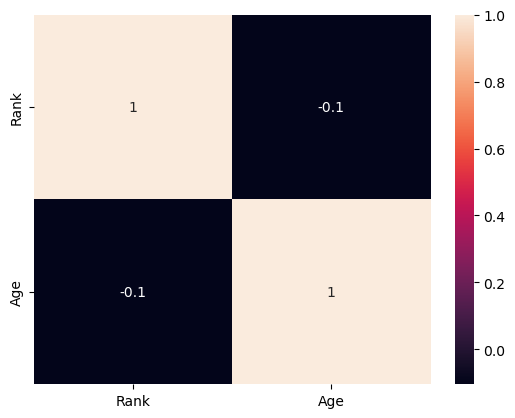

In [33]:
# plot heatmap to display the correlation
sns.heatmap(cor, annot = True)
f = plt.gcf()
f.set_size_inches = (10,12)

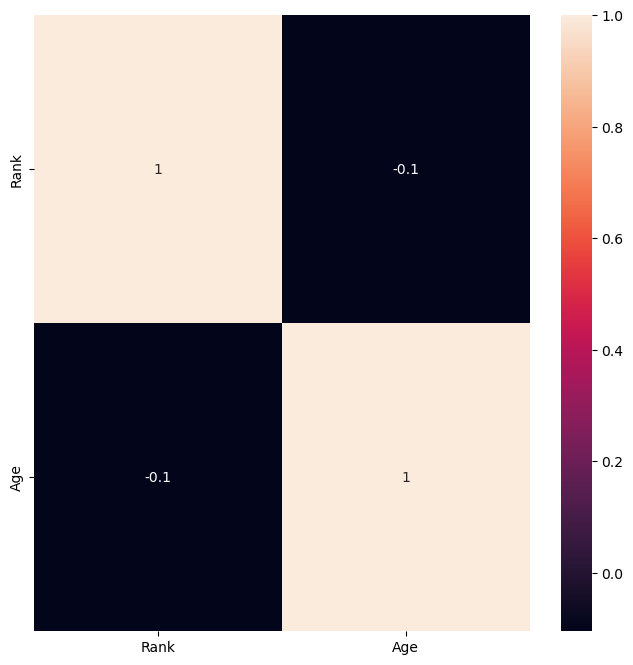

In [28]:
# plot heatmap to display the correlation
sns.heatmap(cor, annot = True)
plt.rcParams["figure.figsize"] = [2,2] # to change the size of the chart

In [36]:
# check for duplicate
df.duplicated().sum()

0

In [36]:
# check for missing value
df.isna().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

# DATA CLEANING

In [35]:
# fill the missing values in Age column with the mean
mean = df.Age.mean()
df.Age.fillna(mean, inplace=True)

#### NB: you must fill the missing values before changing the datatype

In [44]:
# change the datatype of age column from float to int
df['Age'] = df['Age'].astype(int)

In [52]:
# to remove the $ and B sign in Networth column and create a new column with the value from the cleaned Networth
y = lambda x: x.strip('$').strip('B').strip()
df['NetWorth(B)']= df['NetWorth'].apply(y)

In [53]:
df

Name NetWorth        Country         Source  Rank  \
0                   Jeff Bezos   $177 B  United States         Amazon     1   
1                    Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2     Bernard Arnault & family   $150 B         France           LVMH     3   
3                   Bill Gates   $124 B  United States      Microsoft     4   
4              Mark Zuckerberg    $97 B  United States       Facebook     5   
...                        ...      ...            ...            ...   ...   
2750         Daniel Yong Zhang     $1 B          China     e-commerce  2674   
2751             Zhang Yuqiang     $1 B          China     Fiberglass  2674   
2752             Zhao Meiguang     $1 B          China    gold mining  2674   
2753            Zhong Naixiong     $1 B          China   conglomerate  2674   
2754           Zhou Wei family     $1 B          China       Software  2674   

      Age          Industry NetWorth(B)  
0      57        Technology         177  
1      49        Automotive         151  
2      72  Fashion & Retail         150  
3      65        Technology         124  
4      36        Technology          97  
...   ...               ...         ...  
2750   49        Technology           1  
2751   65     Manufacturing           1  
2752   58   Metals & Mining           1  
2753   58       Diversified           1  
2754   54        Technology           1  

[2755 rows x 8 columns]

# DATA EXPLORATION

Data exploration is a process of using chart, statistical functions/text to summarize data or to figure out the pattern or structure of a dataset.

# Uni-variant analysis
#### Uni-variant analysis is the proccess of using one variable to discover a pattern in a dataset

In [53]:
# list top five countries with count of their billionaires
billionaires_count_per_country = df['Country'].value_counts()

In [54]:
# list top five countries with count of their billionaires
top_five = billionaires_count_per_country.nlargest(5)
top_five

United States    724
China            626
India            140
Germany          136
Russia           118
Name: Country, dtype: int64

In [55]:
# list top five countries with count of their billionaires
least_five = billionaires_count_per_country.nsmallest(5)
least_five

Zimbabwe               1
St. Kitts and Nevis    1
Tanzania               1
Macao                  1
Oman                   1
Name: Country, dtype: int64

## PANDAS PLOT

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'China'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Russia')])

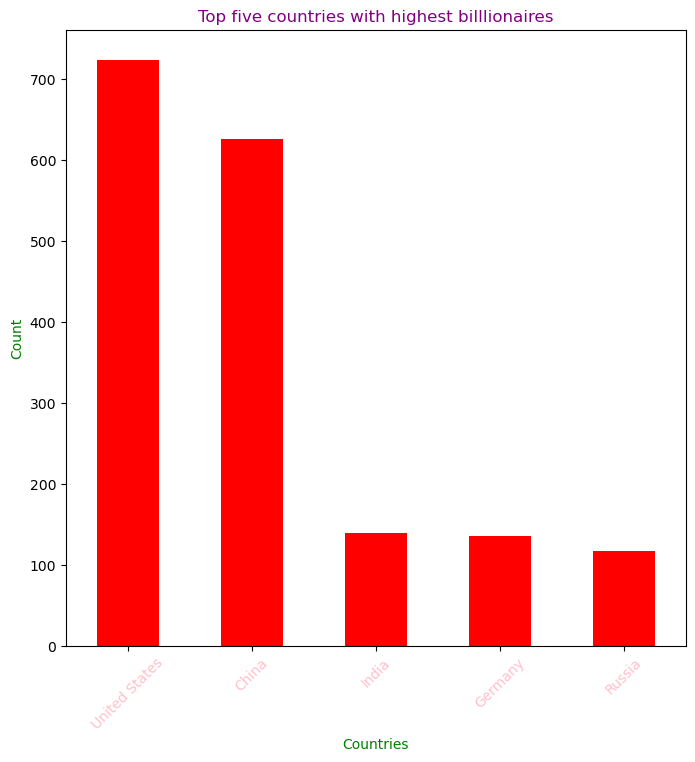

In [94]:
# to plot a chat
top_five.plot(kind = "bar", figsize=(8,8), color="red")

plt.title('Top five countries with highest billlionaires', color = 'purple')
plt.xlabel('Countries', color='green')
plt.ylabel('Count', color='green')
plt.xticks(rotation=45, color = 'pink')

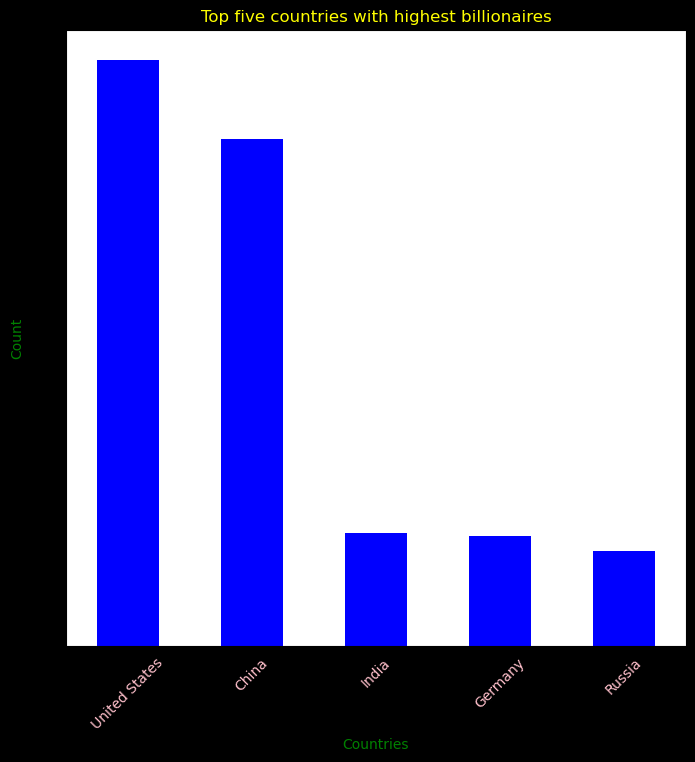

In [96]:
fig, ax = plt.subplots(facecolor='black', figsize=(9,9))
ax.set_facecolor('white')
top_five.plot(kind = "bar", figsize=(8,8), color="blue", ax = ax)
plt.title('Top five countries with highest billionaires', color = 'yellow')
plt.xlabel('Countries', color='green')
plt.ylabel('Count', color='green')
plt.xticks(rotation=45, color = 'pink')
plt.show() #this removes the display of the array code of this chart

In [89]:
df

Name NetWorth        Country         Source  Rank  \
0                   Jeff Bezos   $177 B  United States         Amazon     1   
1                    Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2     Bernard Arnault & family   $150 B         France           LVMH     3   
3                   Bill Gates   $124 B  United States      Microsoft     4   
4              Mark Zuckerberg    $97 B  United States       Facebook     5   
...                        ...      ...            ...            ...   ...   
2750         Daniel Yong Zhang     $1 B          China     e-commerce  2674   
2751             Zhang Yuqiang     $1 B          China     Fiberglass  2674   
2752             Zhao Meiguang     $1 B          China    gold mining  2674   
2753            Zhong Naixiong     $1 B          China   conglomerate  2674   
2754           Zhou Wei family     $1 B          China       Software  2674   

      Age          Industry NetWorth(B)  
0      57        Technology         177  
1      49        Automotive         151  
2      72  Fashion & Retail         150  
3      65        Technology         124  
4      36        Technology          97  
...   ...               ...         ...  
2750   49        Technology           1  
2751   65     Manufacturing           1  
2752   58   Metals & Mining           1  
2753   58       Diversified           1  
2754   54        Technology           1  

[2755 rows x 8 columns]

In [88]:
# the industry with the highest billionaires
df['Industry'].value_counts()

Finance & Investments         371
Technology                    365
Manufacturing                 331
Fashion & Retail              273
Healthcare                    221
Food & Beverage               219
Real Estate                   215
Diversified                   188
Energy                        100
Media & Entertainment          95
Service                        75
Metals & Mining                74
Automotive                     68
Construction & Engineering     44
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: Industry, dtype: int64

In [89]:
billionaires_by_industries = df['Industry'].value_counts()

In [90]:
top_five_by_industry = billionaires_by_industries.nlargest(5)
top_five_by_industry

Finance & Investments    371
Technology               365
Manufacturing            331
Fashion & Retail         273
Healthcare               221
Name: Industry, dtype: int64

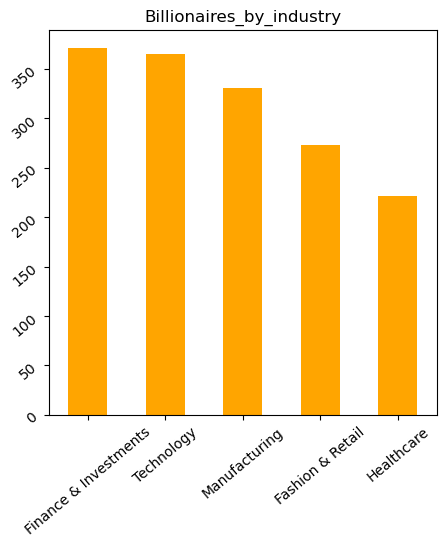

In [100]:
top_five_by_industry.plot(kind = 'bar', figsize= (5,5), color='orange')

plt.title('Billionaires_by_industry')
plt.xticks(rotation=40)
plt.yticks(rotation=40)
plt.show()

In [108]:
least_five = billionaires_count_per_country.nlargest(5)
least_five

United States    724
China            626
India            140
Germany          136
Russia           118
Name: Country, dtype: int64

<BarContainer object of 5 artists>

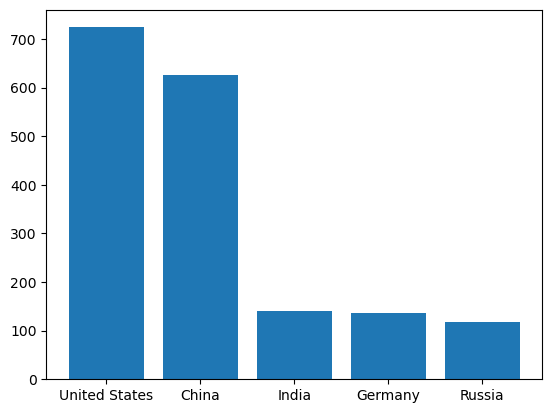

In [101]:
plt.bar(x=top_five.index, height= top_five.values)

# MATPLOT

<BarContainer object of 5 artists>

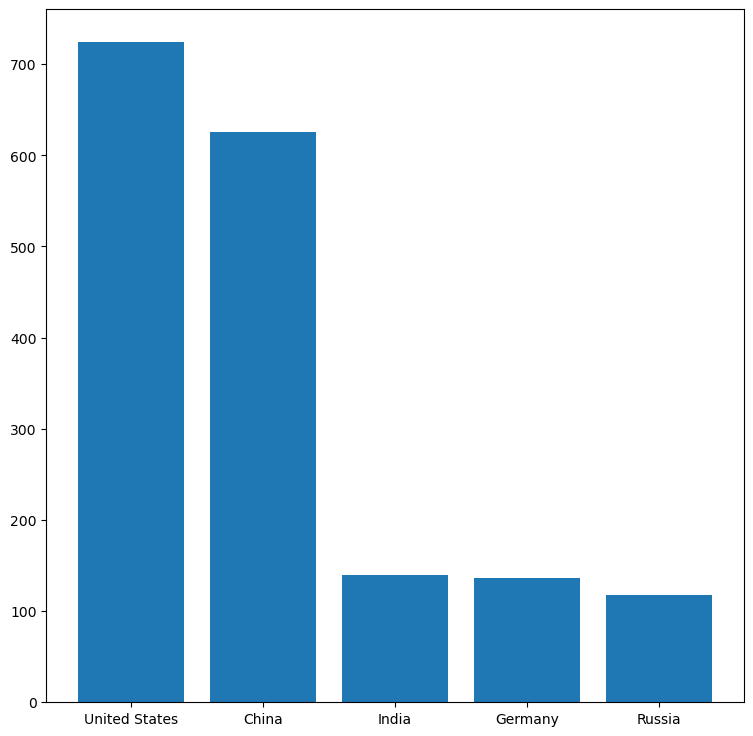

In [98]:
fig, ax = plt.subplots(figsize=(9,9))
plt.bar(x=top_five.index, height= top_five.values)

# SEABORNE

<AxesSubplot:>

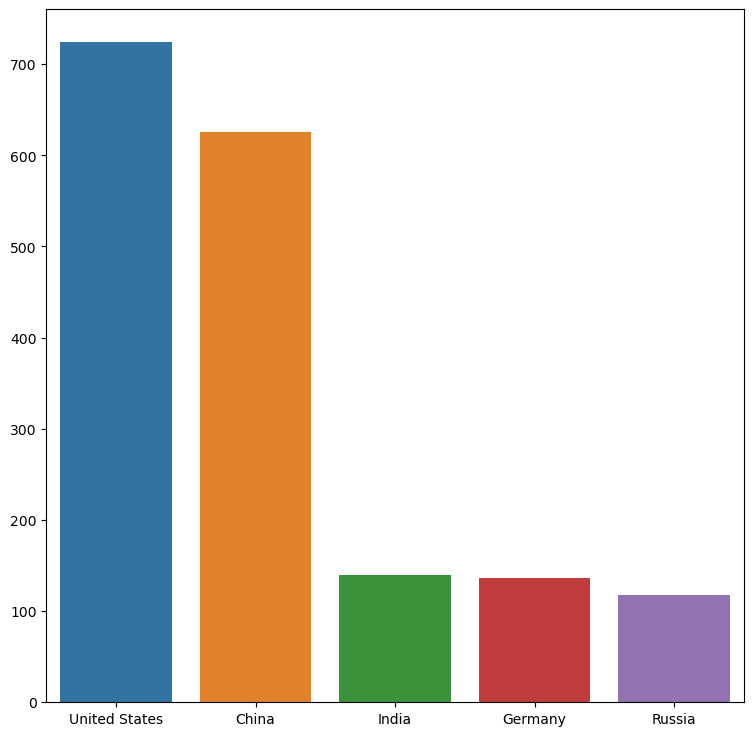

In [99]:
fig, ax = plt.subplots(figsize=(9,9))
sns.barplot(x=top_five.index, y= top_five.values)

<AxesSubplot:ylabel='Frequency'>

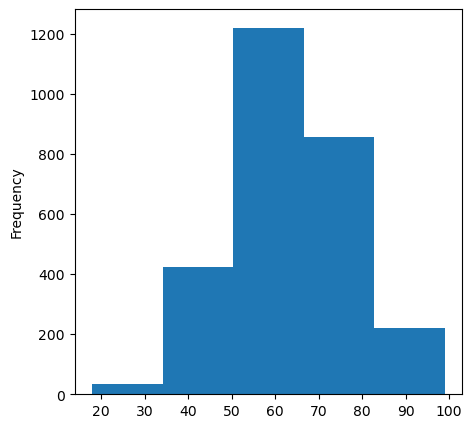

In [133]:
#univariiance analysis for numerical values
fig, ax = plt.subplots(figsize=(5,5))
df['Age'].plot(kind='hist', bins=5)

<AxesSubplot:>

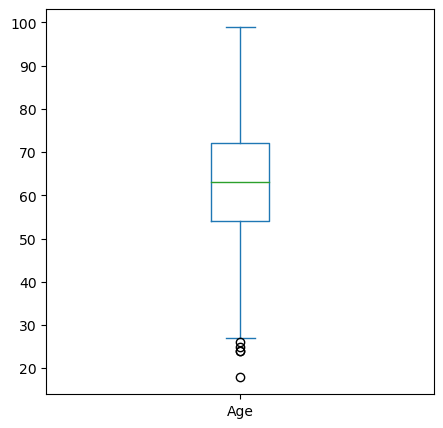

In [134]:
fig, ax = plt.subplots(figsize=(5,5))
df['Age'].plot(kind='box')

In [135]:
df.query('Age <100 & Age>50')

Name NetWorth        Country              Source  \
0                   Jeff Bezos   $177 B  United States              Amazon   
2     Bernard Arnault & family   $150 B         France                LVMH   
3                   Bill Gates   $124 B  United States           Microsoft   
5               Warren Buffett    $96 B  United States  Berkshire Hathaway   
6                Larry Ellison    $93 B  United States            software   
...                        ...      ...            ...                 ...   
2749                Yu De-Chao     $1 B  United States     pharmaceuticals   
2751             Zhang Yuqiang     $1 B          China          Fiberglass   
2752             Zhao Meiguang     $1 B          China         gold mining   
2753            Zhong Naixiong     $1 B          China        conglomerate   
2754           Zhou Wei family     $1 B          China            Software   

      Rank  Age               Industry NetWorth(B)  
0        1   57             Technology         177  
2        3   72       Fashion & Retail         150  
3        4   65             Technology         124  
5        6   90  Finance & Investments          96  
6        7   76             Technology          93  
...    ...  ...                    ...         ...  
2749  2674   57             Healthcare           1  
2751  2674   65          Manufacturing           1  
2752  2674   58        Metals & Mining           1  
2753  2674   58            Diversified           1  
2754  2674   54             Technology           1  

[2296 rows x 8 columns]

In [143]:
df.query("Industry=='Technology'")

Name NetWorth        Country           Source  Rank  \
0                Jeff Bezos   $177 B  United States           Amazon     1   
3                Bill Gates   $124 B  United States        Microsoft     4   
4           Mark Zuckerberg    $97 B  United States         Facebook     5   
6             Larry Ellison    $93 B  United States         software     7   
7                Larry Page  $91.5 B  United States           Google     8   
...                     ...      ...            ...              ...   ...   
2741           Wang Wenjian     $1 B          China  optical devices  2674   
2744  Xia Zhisheng & family     $1 B          China  home appliances  2674   
2747      Mark Haoyong Yang     $1 B          China       e-commerce  2674   
2750      Daniel Yong Zhang     $1 B          China       e-commerce  2674   
2754        Zhou Wei family     $1 B          China         Software  2674   

      Age    Industry NetWorth(B)  
0      57  Technology         177  
3      65  Technology         124  
4      36  Technology          97  
6      76  Technology          93  
7      48  Technology        91.5  
...   ...         ...         ...  
2741   74  Technology           1  
2744   79  Technology           1  
2747   46  Technology           1  
2750   49  Technology           1  
2754   54  Technology           1  

[365 rows x 8 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 0 to 2754
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2755 non-null   object
 1   NetWorth     2755 non-null   object
 2   Country      2755 non-null   object
 3   Source       2755 non-null   object
 4   Rank         2755 non-null   int64 
 5   Age          2755 non-null   int32 
 6   Industry     2755 non-null   object
 7   NetWorth(B)  2755 non-null   object
dtypes: int32(1), int64(1), object(6)
memory usage: 182.9+ KB


In [147]:
df['NetWorth(B)']=df['NetWorth(B)'].astype(float)

# BI-VARIATE ANNALYSIS
Comaring two columns

In [149]:
df.groupby(['Country']).agg({'NetWorth(B)':'mean'})


NetWorth(B)
Country                    
Algeria            4.800000
Argentina          3.060000
Australia          4.125000
Austria            5.225000
Belgium            4.200000
...                     ...
United Kingdom     3.819643
United States      6.075138
Venezuela          3.200000
Vietnam            2.783333
Zimbabwe           1.500000

[70 rows x 1 columns]